In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing datset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
 train_df.shape

(891, 12)

**Observation** There are 891 passengers and we have 12 features/variables in the dataset.

## Handling null values

In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Observation** There are null records in Age feature.

We will replace null values with mean value of Age feature.

In [6]:
train_df['Age'].fillna(
    train_df['Age'].mean(),
    inplace = True
)

In [7]:
train_df.drop('Cabin', axis = 1, inplace = True)

**Summary of database**
1. PassengerId - id of passaneger.
2. Survived - target variable, tells us whether a passager survived or not, 0 = No, 1 = Yes
3. Pclass - this is passanger class, all the passagers are not same and are divided into sevral classes, 1 = 1st, 2 = 2nd, 3 = 3rd
4. Name - Quite obvious, name of the passanger.
5. Sex - Gender of the passanger.
6. Age - Age of passanger.
7. SibSp - Sibling/Spouse - this feature tells how many relatives (sibling or spouse type) of the passenger are onboard.
8. Parch - Parent/Child - this feature tells how many relatives (parent or child type) of the passenget are onboard.
9. Ticket - ticket number.
10. Fare - ticket price.
11. Cabin - Cabin Number.
12. Embarked - Port from which passanger embarked on the voyage, C = Cherbourg, Q = Queenstown, S = Southampton

# Basic EDA

## Analysing target variable

In [8]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Observation** Of the total 891 passangers, 549 passangers unfortunately died and 342 passangers survived.

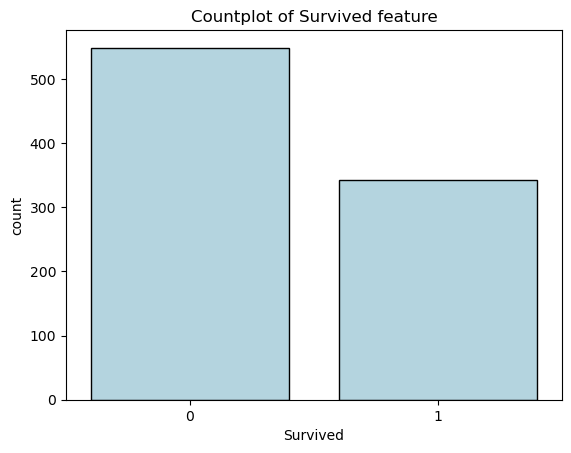

In [9]:
sns.countplot(data = train_df, x = train_df['Survived'], color = 'lightblue', edgecolor = 'black')
plt.title('Countplot of Survived feature')
plt.show()

In [10]:
print(f'Percentage of passengers who survived : {round(train_df["Survived"].value_counts()[0] / train_df.shape[0] * 100, 2)}%')

Percentage of passengers who survived : 61.62%


**Observation** 61.62% passangers survived.

## Analysing Pclass feature

In [11]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**Observation**
1. 216 passangers are of 1st  class.
2. 184 passangers are of 2nd class.
3. 491 passangers are of 3rd class.

**Majority of the passangers are from 3rd class**

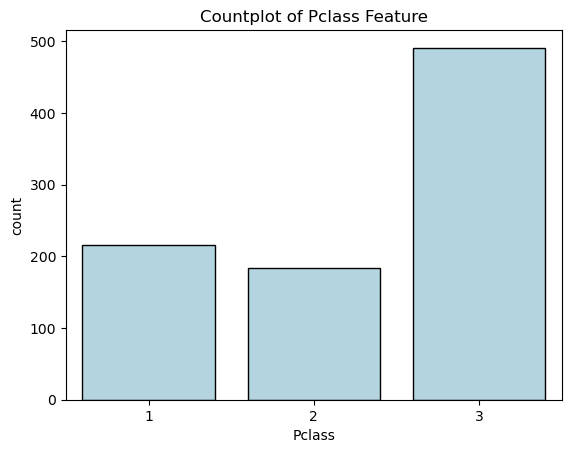

In [12]:
sns.countplot(data = train_df, x = 'Pclass', color = 'lightblue', edgecolor = 'black')
plt.title('Countplot of Pclass Feature')
plt.show()

**Is there a relation between passanger class and if the passanger survived??**

In [13]:
class_vs_survived = train_df.groupby(['Pclass', 'Survived'])['PassengerId'].count().reset_index()

In [14]:
class_vs_survived

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [15]:
def cal_percentage(i):
    class_of_item = class_vs_survived[class_vs_survived['PassengerId'] == i]['Pclass'].values[0]
    count_of_class = class_vs_survived[class_vs_survived['Pclass'] == class_of_item]['PassengerId'].sum()
    return round(i / count_of_class * 100, 2)

In [16]:
class_vs_survived['percentage'] = class_vs_survived['PassengerId'].apply(cal_percentage)

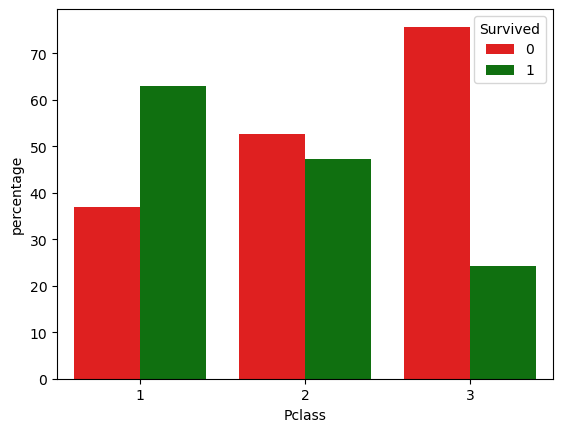

In [17]:
sns.barplot(
    data = class_vs_survived,
    x = 'Pclass',
    y = 'percentage',
    hue = 'Survived',
    palette = {
        0 : 'red',
        1 : 'green'
    }
)
plt.show()

In [18]:
class_vs_survived

,Pclass,Survived,PassengerId,percentage
0,1,0,80,37.04
1,1,1,136,62.96
2,2,0,97,52.72
3,2,1,87,47.28
4,3,0,372,75.76
5,3,1,119,24.24


**Observation** Death rate is highest in the 3rd class i.e. 75.76%.

## Analysis Sex feature

In [19]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

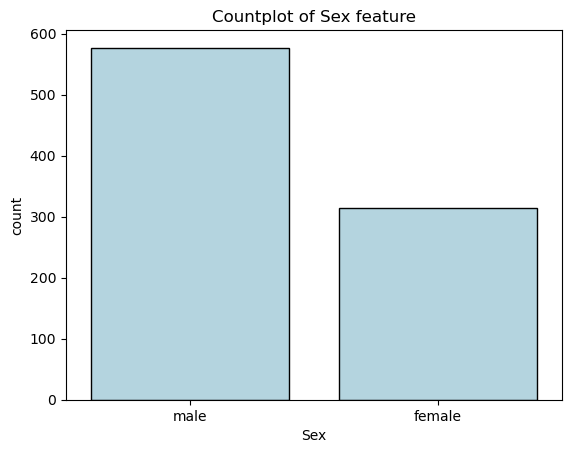

In [20]:
sns.countplot(data = train_df, x = 'Sex', color = 'lightblue', edgecolor = 'black')
plt.title('Countplot of Sex feature')
plt.show()

**Observation**
Of the 891 features 577 are males and 314 are female.

**Is there are relation between gender of the passager and his/her survival feature**

In [21]:
sex_vs_survival = train_df.groupby(['Sex', 'Survived'])['PassengerId'].count().reset_index()

In [22]:
def cal_percentage(i):
    class_of_item = sex_vs_survival[sex_vs_survival['PassengerId'] == i]['Sex'].values[0]
    count_of_class = sex_vs_survival[sex_vs_survival['Sex'] == class_of_item]['PassengerId'].sum()
    return round(i / count_of_class * 100 , 2)

In [23]:
sex_vs_survival['Percentage'] = sex_vs_survival['PassengerId'].apply(cal_percentage)

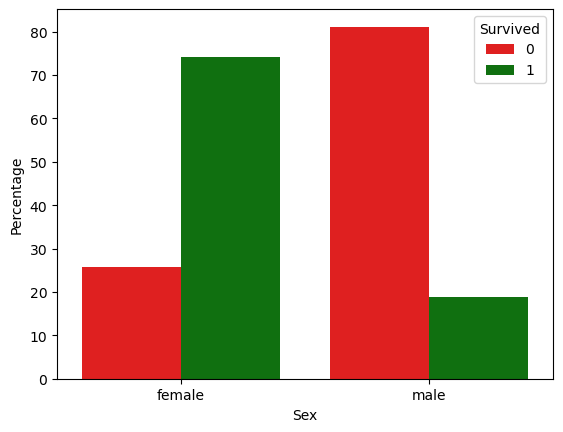

In [24]:
sns.barplot(
    data = sex_vs_survival,
    x = 'Sex',
    y = 'Percentage',
    hue = 'Survived',
    palette = 
    {
        0 : 'red',
        1 : 'green'
    }
)
plt.show()

In [25]:
sex_vs_survival

,Sex,Survived,PassengerId,Percentage
0,female,0,81,25.80
1,female,1,233,74.20
2,male,0,468,81.11
3,male,1,109,18.89


**Observation** Survival rate in male is just 18.89% and survival rate in female is 74.20%. 

**If a passanger is female then you are more likely to survive.**

## Analysing Age feature

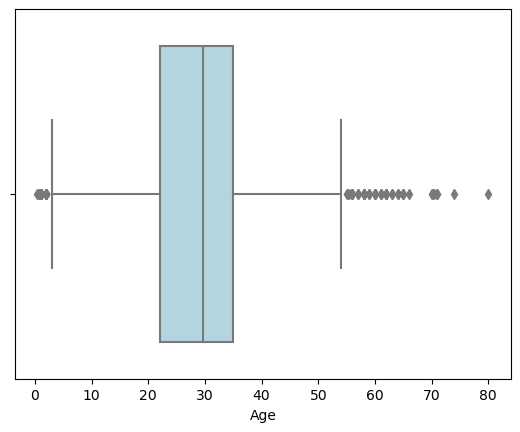

In [26]:
sns.boxplot(data = train_df, x = 'Age', color = 'lightblue')
plt.show()

**observation** : There are outliers in the data

In [27]:
def outlier_handling(column):
    q1 = train_df[column].quantile(.25)
    q3 = train_df[column].quantile(.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    train_df[column] = np.where(train_df[column] < 0, 0, train_df[column])
    train_df[column] = np.where(train_df[column] > upper_limit, upper_limit, train_df[column])

In [28]:
outlier_handling('Age')

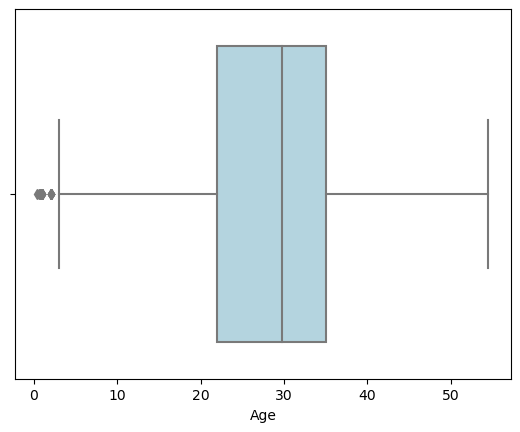

In [29]:
sns.boxplot(data = train_df, x = 'Age', color = 'lightblue')
plt.show()

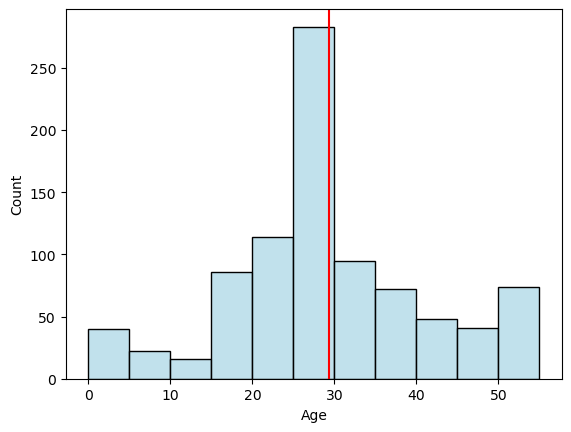

In [30]:
sns.histplot(data = train_df, x = 'Age', bins = range(0, 60, 5), color = 'lightblue')
plt.axvline(x = train_df['Age'].mean(), color = 'red')
plt.show()

In [31]:
train_df['Age'].describe()

count    891.000000
mean      29.345582
std       12.133328
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       54.500000
Name: Age, dtype: float64

**Is there any relation between survival status and age of the passenger**

In [32]:
age_vs_survival = train_df.groupby('Survived')['Age'].mean().reset_index()

In [33]:
age_vs_survival['Age'] = round(age_vs_survival['Age'], 2)

In [34]:
age_vs_survival

,Survived,Age
0,0,29.99
1,1,28.31


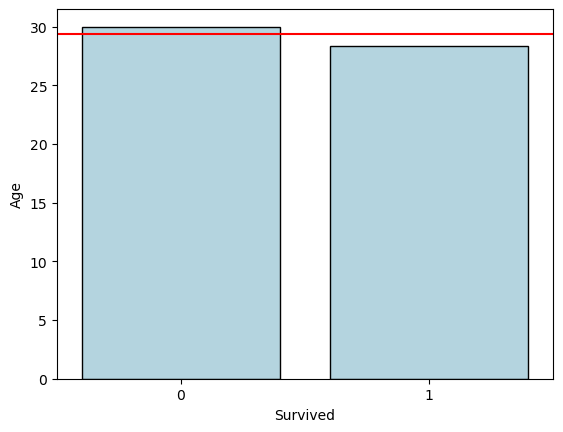

In [35]:
sns.barplot(data = age_vs_survival, x = 'Survived', y = 'Age', color = 'lightblue', edgecolor = 'black')
plt.axhline(y = train_df['Age'].mean(), color = 'r')
plt.show()

**Observation** Avergae age of dead and those who survived is almost equal.

Let's say we divide the age in three brackets old, young and child then is there any relations between those age groups and survival status.

In [36]:
def age_to_age_group(age):
    if age >= 0 and age <= 13:
        return 'Child'
    elif age > 13 and age <= 19:
        return 'Teen'
    elif age > 19 and age <= 60:
        return 'Adult'

In [37]:
train_df['Age_Group'] = train_df['Age'].apply(age_to_age_group)

In [38]:
train_df['Age_Group'].value_counts()

Age_Group
Adult    727
Teen      93
Child     71
Name: count, dtype: int64

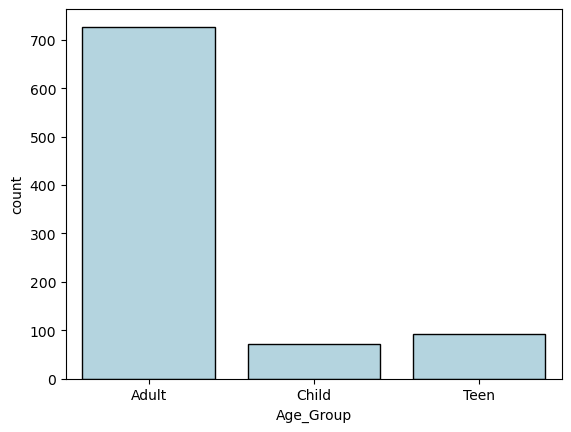

In [39]:
sns.countplot(data = train_df, x = 'Age_Group', color = 'lightblue', edgecolor = 'black')
plt.show()

**Observation** Majority people travelling on the ship are of the age between 20 and 45.

In [40]:
age_group_vs_survival = train_df.groupby(['Age_Group', 'Survived'])['PassengerId'].count().reset_index()

In [41]:
age_group_vs_survival

,Age_Group,Survived,PassengerId
0,Adult,0,464
1,Adult,1,263
2,Child,0,29
3,Child,1,42
4,Teen,0,56
5,Teen,1,37


Of the total children how many survived??

In [42]:
def cal_percentage(i):
    class_of_item = age_group_vs_survival[age_group_vs_survival['PassengerId'] == i]['Age_Group'].values[0]
    count_of_class = age_group_vs_survival[age_group_vs_survival['Age_Group'] == class_of_item]['PassengerId'].sum()
    return round(i / count_of_class * 100, 2)

In [43]:
age_group_vs_survival['Percentage'] = age_group_vs_survival['PassengerId'].apply(cal_percentage)

In [44]:
age_group_vs_survival

,Age_Group,Survived,PassengerId,Percentage
0,Adult,0,464,63.82
1,Adult,1,263,36.18
2,Child,0,29,40.85
3,Child,1,42,59.15
4,Teen,0,56,60.22
5,Teen,1,37,39.78


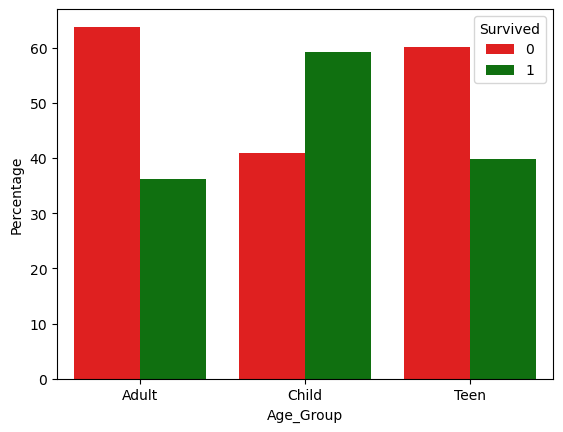

In [45]:
sns.barplot(
    data = age_group_vs_survival,
    x = 'Age_Group',
    y = 'Percentage',
    hue = 'Survived',
    palette = {
        0: 'red',
        1: 'green'}
)
plt.show()

**Observation** Passengers that are old have higher percentage of death, only in the child age-group we see that majority passangers have survived. 

## Analysing SibSp and Parch feature

* SibSp is combination of two words, Sibling + Spouse
* This feature tells how many relatives of the type Sibling or Spouse are travelling with the passenger.
* There is another column that is similar called Parch
* Parch is combination of two words, Parent + Child
* This feature tells how many relatives of the type Parent or Child are travelling with the passenger.

In [46]:
train_df['SibSp'].value_counts().reset_index()

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


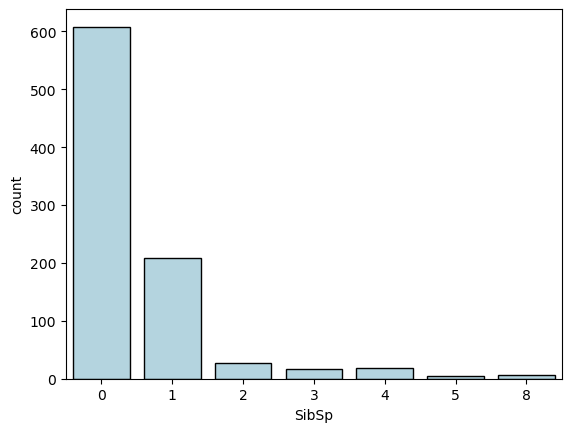

In [47]:
sns.countplot(data = train_df, x = 'SibSp', color = 'lightblue', edgecolor = 'black')
plt.show()

**Observation** Majority of the passengers, 608 are not travelling with any Sibling or spouse

Let's  divide the passengers into two types -- those travelling with SibSp and those travelling alone.

In [48]:
df_SibSp = train_df[['PassengerId', 'Survived', 'SibSp']]

In [49]:
def if_SibSp(i):
    if i == 0:
        return 'No'
    else:
        return 'Yes'

In [50]:
df_SibSp['SibSp'] = df_SibSp['SibSp'].apply(if_SibSp)

In [51]:
df_SibSp = df_SibSp.groupby(['SibSp', 'Survived'])['PassengerId'].count().reset_index()

In [52]:
def cal_percentage(i):
    class_of_item = df_SibSp[df_SibSp['PassengerId'] == i]['SibSp'].values[0]
    count_of_class = df_SibSp[df_SibSp['SibSp'] == class_of_item]['PassengerId'].sum()
    return round(i / count_of_class * 100, 2)

In [53]:
df_SibSp['Percentage'] = df_SibSp['PassengerId'].apply(cal_percentage)

In [54]:
df_SibSp

,SibSp,Survived,PassengerId,Percentage
0,No,0,398,65.46
1,No,1,210,34.54
2,Yes,0,151,53.36
3,Yes,1,132,46.64


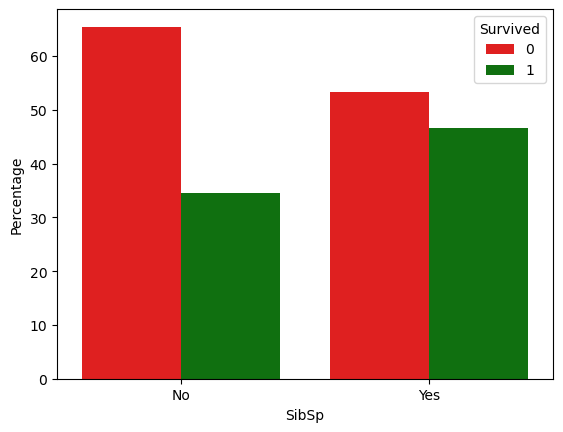

In [55]:
sns.barplot(
    data = df_SibSp,
    x = 'SibSp',
    y = 'Percentage',
    hue = 'Survived',
    palette = {
        0 : 'red',
        1 : 'green'
    }
)
plt.show()

**Death rate is higher when passenger is not travelling sibling or spouse.**

In [56]:
train_df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

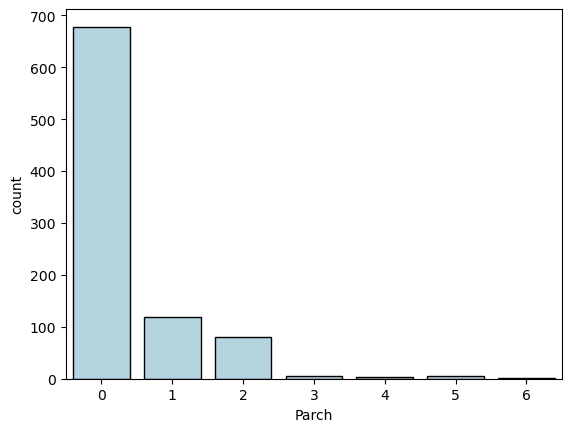

In [57]:
sns.countplot(data = train_df, x = 'Parch', color = 'lightblue', edgecolor = 'black')
plt.show()

**Observation** Majority of the passengers, 678 are not travelling with any Parent or Child

In [58]:
df_Parch = train_df[['PassengerId', 'Survived', 'Parch']]

In [59]:
def if_Parch(i):
    if i == 0:
        return 'No'
    else:
        return 'Yes'

In [60]:
df_Parch['Parch'] = df_Parch['Parch'].apply(if_Parch)

In [61]:
df_Parch = df_Parch.groupby(['Parch', 'Survived'])['PassengerId'].count().reset_index()

In [62]:
def cal_percentage(i):
    class_of_item = df_Parch[df_Parch['PassengerId'] == i]['Parch'].values[0]
    count_of_class = df_Parch[df_Parch['Parch'] == class_of_item]['PassengerId'].sum()
    return round(i / count_of_class * 100, 2)

In [63]:
df_Parch['Percentage'] = df_Parch['PassengerId'].apply(cal_percentage)

In [64]:
df_Parch

,Parch,Survived,PassengerId,Percentage
0,No,0,445,65.63
1,No,1,233,34.37
2,Yes,0,104,48.83
3,Yes,1,109,51.17


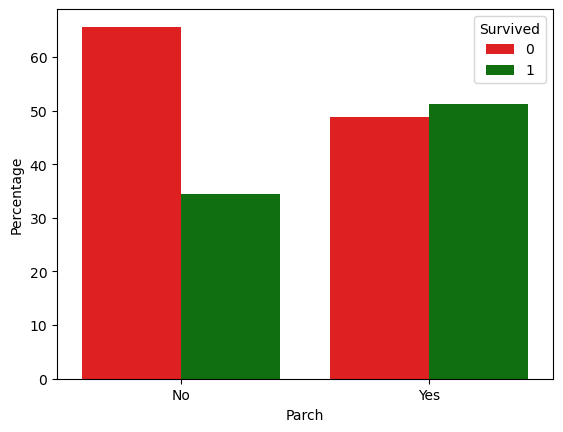

In [65]:
sns.barplot(
    data = df_Parch,
    x = 'Parch',
    y = 'Percentage',
    hue = 'Survived',
    palette = {
        0 : 'red',
        1 : 'green'
    }
)
plt.show()

**Passengers travelling without parent are more likely to die.**

## Analysing fare

In [66]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

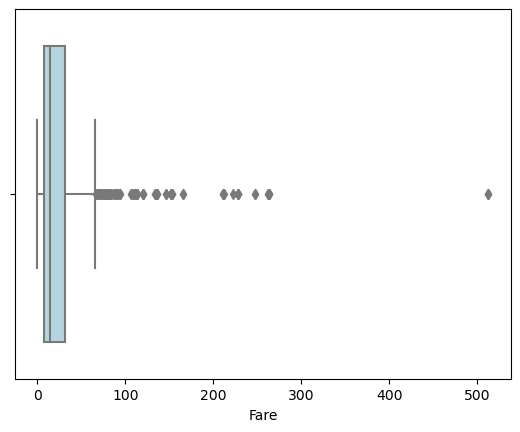

In [67]:
sns.boxplot(data = train_df, x = 'Fare', color = 'lightblue')
plt.show()

In [68]:
outlier_handling('Fare')

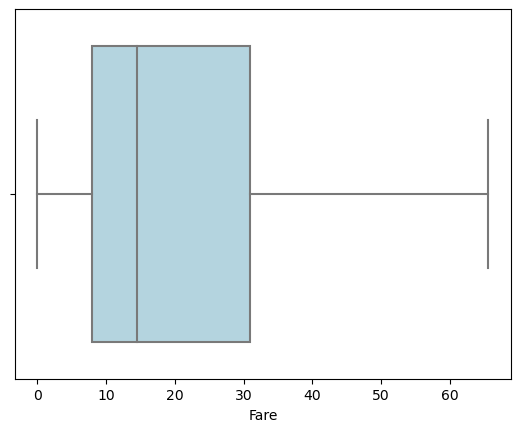

In [69]:
sns.boxplot(data = train_df, x = 'Fare', color = 'lightblue')
plt.show()

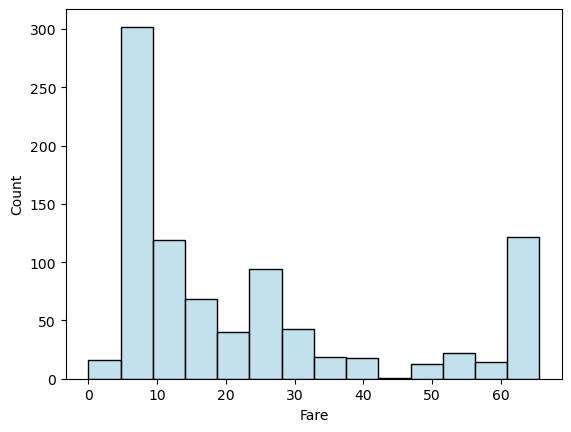

In [70]:
sns.histplot(data = train_df, x = 'Fare', color = 'lightblue')
plt.show()

In [71]:
train_df['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

Let's divivde the fare into 3 groups 'Cheap', 'Medium', 'Expensive'...

In [72]:
def ticket_class(i):
    if i >= 0 and i <= 30:
        return 'Class - 1'
    elif i > 30 and i <= 50:
        return 'Class - 2'
    else:
        return 'Class - 3'

In [73]:
train_df['Ticket_class'] = train_df['Fare'].apply(ticket_class)

In [74]:
fare_vs_survived = train_df.groupby(['Ticket_class', 'Survived'])['PassengerId'].count().reset_index()

In [75]:
def cal_percentage(i):
    class_of_item = fare_vs_survived[fare_vs_survived['PassengerId'] == i]['Ticket_class'].values[0]
    count_of_class = fare_vs_survived[fare_vs_survived['Ticket_class'] == class_of_item]['PassengerId'].sum()
    return round(i / count_of_class * 100, 2)

In [76]:
fare_vs_survived['Percentage'] = fare_vs_survived['PassengerId'].apply(cal_percentage)

In [77]:
fare_vs_survived

,Ticket_class,Survived,PassengerId,Percentage
0,Class - 1,0,451,68.65
1,Class - 1,1,206,31.35
2,Class - 2,0,47,63.51
3,Class - 2,1,27,36.49
4,Class - 3,0,51,31.87
5,Class - 3,1,109,68.12


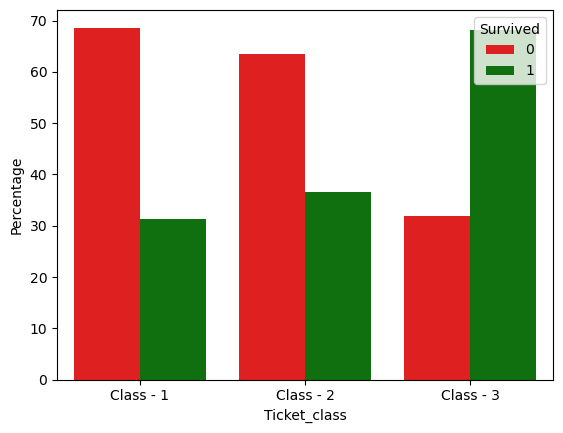

In [78]:
sns.barplot(
    data = fare_vs_survived,
    x = 'Ticket_class',
    y = 'Percentage',
    hue = 'Survived',
    palette = {0 : 'red', 1 : 'green'}
)
plt.show()

**We can see that class-3 ticket group have higher survival rate**

## Analysing Embarked feature

what is embarked feature?
* this is a feature that tells from which port the passenger embarked on the voyage.
* there are three classes - S, C, and Q
* C = Cherbourg
* Q = Queenstown
* S = Southampton

In [80]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

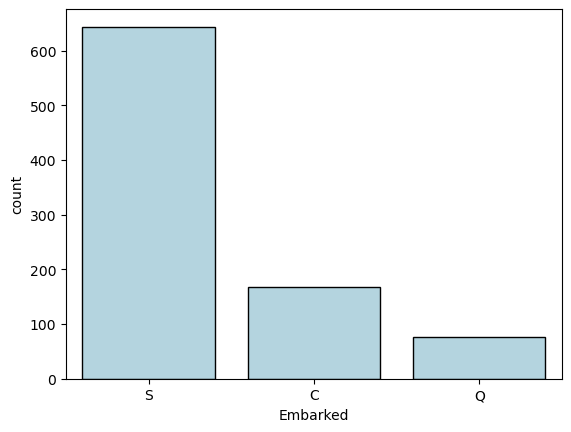

In [81]:
sns.countplot(data = train_df, x = 'Embarked', color = 'lightblue', edgecolor = 'black')
plt.show()

Majority of the passengers embarked on the journey from Southampton port.

In [82]:
embarked_vs_survived = train_df.groupby(['Embarked', 'Survived'])['PassengerId'].count().reset_index()

In [83]:
def cal_percentage(i):
    class_of_item = embarked_vs_survived[embarked_vs_survived['PassengerId'] == i]['Embarked'].values[0]
    count_of_class = embarked_vs_survived[embarked_vs_survived['Embarked'] == class_of_item]['PassengerId'].sum()
    return round(i / count_of_class * 100, 2)

In [84]:
embarked_vs_survived['Percentage'] = embarked_vs_survived['PassengerId'].apply(cal_percentage)

In [85]:
embarked_vs_survived

,Embarked,Survived,PassengerId,Percentage
0,C,0,75,44.64
1,C,1,93,55.36
2,Q,0,47,61.04
3,Q,1,30,38.96
4,S,0,427,66.30
5,S,1,217,33.70


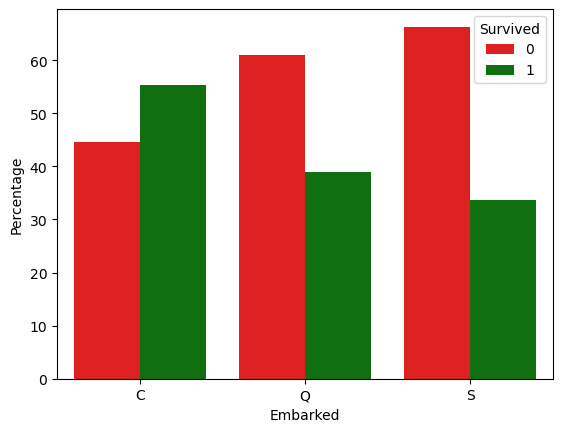

In [86]:
sns.barplot(
    data = embarked_vs_survived,
    x = 'Embarked',
    y = 'Percentage',
    hue = 'Survived',
    palette = {
        0 : 'red',
        1 : 'green'
    }
)
plt.show()

# Data preprocessing

In [87]:
train_df.drop(['Name', 'Ticket', 'Age_Group', 'Ticket_class', 'PassengerId'], axis = 1, inplace = True)

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le = LabelEncoder()

In [90]:
train_df['Sex'] = le.fit_transform(train_df['Sex'])

In [91]:
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

In [92]:
def min_max_scaling_age(i, feature_range = (0, 1)):
    min_data = min(train_df['Age'])
    max_data = max(train_df['Age'])
    scaling_factor = feature_range[1] - feature_range[0]
    return round(((i - min_data) / (max_data - min_data)) * scaling_factor, 2)

In [93]:
train_df['Age'] = train_df['Age'].apply(min_max_scaling_age)

In [94]:
def min_max_scaling_fare(i, feature_range = (0, 1)):
    min_data = min(train_df['Fare'])
    max_data = max(train_df['Fare'])
    scaling_factor = feature_range[1] - feature_range[0]
    return round(((i - min_data) / (max_data - min_data)) * scaling_factor, 2)

In [95]:
train_df['Fare'] = train_df['Fare'].apply(min_max_scaling_fare)

In [96]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.40,1,0,0.11,2
1,1,1,0,0.69,1,0,1.00,0
2,1,3,0,0.47,0,0,0.12,2
3,1,1,0,0.64,1,0,0.81,2
4,0,3,1,0.64,0,0,0.12,2


## Separating dependent and independent features

In [97]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


## Model Evaluation

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score

def model_evaluation(y, y_pred):
    print('***********************************************************')
    print(f'Mean absolute error : {mean_absolute_error(y, y_pred)}')
    print(f'Mean squared error : {mean_squared_error(y, y_pred)}')
    print(f'Accuracy score : {accuracy_score(y, y_pred)}')
    print('-----------------------------------------------------------')
    print(f'Confusion Matrix :')
    print(confusion_matrix(y, y_pred))
    print('***********************************************************')
    
def model_score(model):
    print('***********************************************************')
    print(f'Training Score : {model.score(X_train, y_train)}')
    print(f'Testing Score : {model.score(X_test, y_test)}')
    print('***********************************************************')

## Model Building

### Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
dtc = DecisionTreeClassifier()

parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : np.arange(0, 20, 1)
}

dtc_grid = GridSearchCV(estimator = dtc, param_grid = parameter, verbose = 1)

In [105]:
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])},
             verbose=1)

In [106]:
dtc_grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [107]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [108]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [109]:
y_pred = dtc.predict(X_test)

In [110]:
model_evaluation(y_pred, y_test)
model_score(dtc)

***********************************************************
Mean absolute error : 0.2011173184357542
Mean squared error : 0.2011173184357542
Accuracy score : 0.7988826815642458
-----------------------------------------------------------
Confusion Matrix :
[[92 23]
 [13 51]]
***********************************************************
***********************************************************
Training Score : 0.8342696629213483
Testing Score : 0.7988826815642458
***********************************************************


There is no significant overfitting in the model.

# Creating Submission file

In [111]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [112]:
test_id = test_df['PassengerId']
test_df.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [113]:
test_df['Sex'] = le.fit_transform(test_df['Sex'])

In [114]:
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

In [115]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [116]:
def min_max_scaling_age(i, feature_range = (0, 1)):
    min_data = min(test_df['Age'])
    max_data = max(test_df['Age'])
    scaling_factor = feature_range[1] - feature_range[0]
    return round(((i - min_data) / (max_data - min_data)) * scaling_factor, 2)

In [117]:
test_df['Age'] = test_df['Age'].apply(min_max_scaling_age)

In [118]:
def min_max_scaling_fare(i, feature_range = (0, 1)):
    min_data = min(test_df['Fare'])
    max_data = max(test_df['Fare'])
    scaling_factor = feature_range[1] - feature_range[0]
    return round(((i - min_data) / (max_data - min_data)) * scaling_factor, 2)

In [119]:
test_df['Fare'] = test_df['Fare'].apply(min_max_scaling_fare)

In [120]:
test_df['Prediction'] = dtc.predict(test_df.drop(['PassengerId'], axis = 1))

In [121]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prediction
0,892,3,1,0.45,0,0,0.02,1,0
1,893,3,0,0.62,1,0,0.01,2,1
2,894,2,1,0.82,0,0,0.02,1,0
3,895,3,1,0.35,0,0,0.02,2,0
4,896,3,0,0.29,1,1,0.02,2,1


In [122]:
submission = test_df[['PassengerId', 'Prediction']]

In [123]:
submission.set_index('PassengerId', inplace = True)

In [124]:
submission.head()

,Prediction
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [125]:
submission.to_csv('submission.csv')